## 1. 개요

    + 파이썬으로 구현된 쉽고 간결한 딥러닝 라이브러리
    + 프랑소와 숄레가 2015년 3월에 발표
    + 내부적으로는 텐서플로 엔진이 구동되지만 직관적인API로 쉽게 딥러닝
    실험을 할 수 있도록 지원
    
## 2. 주요 특징

    + 모듈화 : 독립적인 모듈들을 조합하여 구현
    + 최소주의 : 각 모듈을 짧고 간결
    + 쉬운 확장성 : 클래스나 함수로 모듈을 쉽게 추가 할 수 있다.
    + 파이썬 기반 : 별도의 설정이 필요없다.
    
## 3.설치

    pip uninstall keras
    pip install keras==2.3.1
    
## 4.API

    1. 준비
        Sequential()
        
    2. 계층 설정
        Dense()
        
    3. 컴파일
        compile()
    4. 학습(훈련)
        fit()
    5. 평가
        evaluate()
    6. 예측 
        predict()

In [3]:


import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping


#CNN
from keras.datasets import mnist
from keras import layers



Using TensorFlow backend.


In [ ]:
print(keras.__version__)

# 과거 텐서플로만 사용하여 한 예제

In [ ]:
# 데이터 준비
x_train = [1,2,3,4,5]
y_train = [2.1,3.1,4.1,5.1,6.1]

# 데이터 준비
x_train = tf.placeholder(tf.float32, shape = [None])
y_train = tf.placeholder(tf.float32, shape = [None])

#가설 준비 : WX +b
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32)

hypot = W*x_train +b

#비용함수

cost = tf.reduce_mean(tf.square(hypot - y_train))
# 최저 비용 학습을 위한 경사하강알고리즘
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#----------------- 텐서플로우의 그래프 작성 완료


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, c, w, b1 = sess.run([train, cost, W,b], feed_dict ={x_train:[1,2,3,4,5],
                                                      y_train:[2.1,3.1,4.1,5.1,6.1]})
    if step%500 ==0:
        print(step, c, w, b1)
    
# Testing
print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5,3.7]}))
sess.close()


- Sequential 모데을 레이어를 선형적으로 쌓는다. 
- .add() 를 통해 레이어를 쌓을수있다., input_dim 인수로 최초의 레이어 입력크기 설정
- activation 인수로 활성화 함수 설정
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
- .compile() 학습과정을 조정할수있다. , 옵티마이저까지 조정가능
    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics['accuracy'])
### compile 에서 메트릭 : 평가 기준이고 사용자 정의 메트릭을 사용가능하다.
### model. predict(np.array([예측할 값])
### predict(x, batch_size=None, verbose=0, steps=None, callbacks=None)
    - x : Numpy 배열 형태의 인풋 데이터

In [ ]:
# 데이터 준비
x_train = [1,2,3,4,5]
y_train = [2.1,3.1,4.1,5.1,6.1]

#모델 구성하기
model = Sequential()
model.add(Dense(1, input_shape = (1,)))
# model.compile(loss = "mse", optimizer="rmsprop", metrics = ["accuracy"])
# RMSprop 객체를 이용하여 learning rate조정가능
model.compile(loss = "mse", optimizer=RMSprop(lr=0.01), metrics = ["accuracy"])

model.summary()

model_result=model.fit(x_train, y_train, epochs = 1000 )
print(model_result.history["loss"]) #lostt값들쭉 나옴

model.predict(x_train)
# 예측 어떻게 하는지 
model.predict(np.array([27,2.5,3.7]))

In [ ]:
#np.array로 해줘야함
X = np.array([[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]])
y = np.array([[152.],[185.],[180.],[196.],[142.]])
# 출력의 개수 1개 입력의 개수 3
model = Sequential([Dense(1, input_shape=(3,))])
model.compile(loss="mse", optimizer = RMSprop(lr = 0.01))

model.fit(X, y, epochs = 1000, batch_size = 1 )

model.predict(X)

## 09.txt (파일) :  Age, Weigth, 혈당 등등있는 25x 5 

참고 
- https://sdc-james.gitbook.io/onebook/4.-and/5.4.-tensorflow/5.4.1.-keras
2. 참고
    - https://pinkwink.kr/1082?category=580892

In [ ]:
# 혈당 수치 예측
# skip_header 로 스킵
data = np.genfromtxt("data/x09.txt", skip_header = 36)
data

In [ ]:
# 체중이 100 이고 나이가 40일떄의 혈당은?
dataframe = pd.DataFrame(data)
dataframe

In [ ]:
array = dataframe.values

In [ ]:
X = array[:, 2:4]
y = array[:, 4:5]

In [ ]:
#create model
model = Sequential([Dense(1, input_shape=(2,))])
model.compile(loss="mse", optimizer = RMSprop(lr = 0.01))
model.fit(X, y, epochs = 1000, batch_size = 1 )

model.predict(X)

In [ ]:
print("100Kg, 40세", model.predict(np.array([100,40]).reshape(1,2)))

## 선생님꺼

In [ ]:
# 혈당 수치 예측
# skip_header 로 스킵
data = np.genfromtxt("data/x09.txt", skip_header = 36)

X = data[:, 2:4]
y = data[:, 4:5]

model = Sequential([Dense(1, input_shape=(2,))])
model.compile(loss="mse", optimizer = RMSprop(lr = 0.01))
hist = model.fit(X, y, epochs = 400, batch_size = 1 )
# loss의 변화를 알고싶다. 
plt.plot(hist.history["loss"])
# np.array([100,40]) 안되는이유 1차원이라서
model.predict(np.array([100,40]).reshape(1,2))

In [ ]:
# 보스턴 주택 가격 예측

from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train[0:10])

In [ ]:
X_train[0:5]
# 표준화를 직접 해본 코드 standardization
mean = X_train.mean(axis = 0)
X_train -= mean
std = X_train.std(axis = 0)
X_train /= std
X_test -= mean
X_test /= std

X_train[0:5]

## 다양한 activation 들이 있음
- softmax, elu, relu, sigmoid, linear 등등

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape = (X_train.shape[1],), activation ="relu"))
# 자동적으로 입력개수 만들어준다. 2번째 계층부터 inputshape 할필요없음
# 이번에도 출력개수 64개로 하겠다.
model.add(Dense(64,activation ="relu"))
model.add(Dense(1)) #최종 출력개수 1

model.summary()
# mse 평균 제곱 오차 예측과 타깃 사이의 거리의 제곱
# 훈련 모니터링을 위해 새로운 지표인 평균 절대 오차 
# Mean Absolute Error 예를들어 0.5이면 평균적으로 500달러 정도 차이

model.compile(loss="mse", optimizer = "rmsprop", metrics = ["mae"])
model.fit(X_train, y_train, epochs = 100, batch_size=1)

In [ ]:
# 측정도구 mae 
mse, mae=model.evaluate(X_test, y_test)
print(mse, mae)

# OR gate

In [ ]:
# 데이터 준비
X = np.array([[0, 0, 0], 
                   [0, 0, 1], 
                   [0, 1, 0], 
                   [0, 1, 1], 
                   [1, 0, 0],
                   [1, 1, 0],
                   [1, 0, 1], 
                   [1, 1, 1]], 
                  dtype=np.float32)                   
y = np.array([[0], [1], [1], [1], [1], [1], [1], [1]], dtype=np.float32)
# units 출력의 개수 1 , input_shape 입력의개수
model = Sequential([Dense(units =1 , input_shape=(3,), activation="sigmoid")])
model.compile(loss = "binary_crossentropy", optimizer ="rmsprop",
              metrics = ["accuracy"])
model.fit(X,y,epochs=3000)

In [ ]:
model.predict(X)

### mnist 손글씨 사례
    참고 -
    - https://datascienceschool.net/view-notebook/51e147088d474fe1bf32e394394eaea7/

    참고 - https://m.blog.naver.com/PostView.nhn?blogId=ksg97031&logNo=221302568510&proxyReferer=https:%2F%2Fwww.google.com%2F
    
    비슷코드 - 
    https://hdongle.tistory.com/47

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [5]:
y_train= np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
y_test[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
# 이미지 데이터 스케일 조정
X_train = X_train.reshape(60000, 28*28).astype("float32")/255
X_test = X_test.reshape(10000, 28*28).astype("float32")/255

In [8]:
# validation 분할
X_val = X_train[:12600]
X_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]


In [9]:
# 모델 구성 
model = Sequential()
model.add(Dense(units=64, input_shape =(28*28,), activation = "relu"))
#입력은 자동이라 안써도됨 input_shape = (64,)
#relu는 0 보다 작은값은 0으로 반환하고 0보다 큰 값이 나온경우 그값을
#"그대로" 반환하는 함수이다. max(0, x) 
#Sigmoid는 0~1 사이값만 다루므로 계속 곱하면 0에 수렵한다.
#1보다 작아지지 않게 
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_val, y_val))


Train on 47400 samples, validate on 12600 samples
Epoch 1/50
47400/47400 [==============================] - 2s 35us/step - loss: 0.7701 - accuracy: 0.8022 - val_loss: 0.4152 - val_accuracy: 0.8889
Epoch 2/50
47400/47400 [==============================] - 2s 33us/step - loss: 0.3807 - accuracy: 0.8942 - val_loss: 0.3377 - val_accuracy: 0.9075
Epoch 3/50
47400/47400 [==============================] - 2s 32us/step - loss: 0.3281 - accuracy: 0.9073 - val_loss: 0.3075 - val_accuracy: 0.9136
Epoch 4/50
47400/47400 [==============================] - 2s 33us/step - loss: 0.2991 - accuracy: 0.9145 - val_loss: 0.2813 - val_accuracy: 0.9215
Epoch 5/50
47400/47400 [==============================] - 2s 32us/step - loss: 0.2769 - accuracy: 0.9211 - val_loss: 0.2714 - val_accuracy: 0.9240
Epoch 6/50
47400/47400 [==============================] - 1s 31us/step - loss: 0.2584 - accuracy: 0.9272 - val_loss: 0.2535 - val_accuracy: 0.9281
Epoch 7/50
47400/47400 [==============================] - 1s 31us/s

In [11]:
result = model.evaluate(X_test, y_test, batch_size=32)
print(result)

10000/10000 [==============================] - 0s 16us/step
[0.09721958452332764, 0.9713000059127808]


In [12]:
np.random.seed(7)

xhat_idx = np.random.choice(X_test.shape[0], 10)
xhat_idx

array([9412,  537, 5699, 4307,  919, 1372, 7566, 2583, 4441, 3239])

In [13]:
# x hat 수학기호에서 x위에 꺽세 표시하는 수학기호 따서 변수이름설정
xhat = X_test[xhat_idx]
xhat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
yhat = model.predict_classes(xhat)
yhat

array([4, 1, 1, 5, 2, 2, 0, 3, 6, 2], dtype=int64)

In [15]:
for i in range(10):
    print("True : ", np.argmax(y_test[xhat_idx[i]]), ", Predict : ", yhat[i])

True :  4 , Predict :  4
True :  1 , Predict :  1
True :  1 , Predict :  1
True :  5 , Predict :  5
True :  2 , Predict :  2
True :  2 , Predict :  2
True :  0 , Predict :  0
True :  3 , Predict :  3
True :  6 , Predict :  6
True :  2 , Predict :  2


# 텐서보드 설정
## 텐서플로우가 제공하는 시각화 도구
    - 동적그래프나 모델 내 다양한 레이어에 대한 활성화 히스토그램을 시각화
    -log_dir: TensorBoard가 구문 분석할 로그 파일을 저장할 위치 경로.
    -write_graph: TensorBoard에서 그래프를 시각화할지 여부
    -write_images: TensorBoard에서 이미지로 시각화할 모델 가중치를 작성할지 여부.

In [22]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train= np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 이미지 데이터 스케일 조정
X_train = X_train.reshape(60000, 28*28).astype("float32")/255
X_test = X_test.reshape(10000, 28*28).astype("float32")/255
# validation 분할
X_val = X_train[:12600]
X_train = X_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]

model = Sequential()
model.add(Dense(units=64, input_shape =(28*28,), activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

#텐서보드 설정 
tf_hist=keras.callbacks.TensorBoard(log_dir="./graph", write_graph=True,
                           write_images=True)
#이거 ai폴더 , graph 폴더 있는곳까지 가서 실행해야함
#텐서보드 설정: tensorboard --logdir=graph
#localhost:6006 으로 접속

#조기 종료 설정
early = EarlyStopping()


model.fit(X_train, y_train, epochs = 50, batch_size = 32,
          validation_data = (X_val, y_val),callbacks = [tf_hist, early])


Train on 47400 samples, validate on 12600 samples
Epoch 1/50
47400/47400 [==============================] - 2s 34us/step - loss: 0.7235 - accuracy: 0.8099 - val_loss: 0.4036 - val_accuracy: 0.8921
Epoch 2/50
47400/47400 [==============================] - 2s 37us/step - loss: 0.3662 - accuracy: 0.8978 - val_loss: 0.3218 - val_accuracy: 0.9103
Epoch 3/50
47400/47400 [==============================] - 2s 37us/step - loss: 0.3122 - accuracy: 0.9114 - val_loss: 0.2879 - val_accuracy: 0.9199
Epoch 4/50
47400/47400 [==============================] - 2s 34us/step - loss: 0.2815 - accuracy: 0.9193 - val_loss: 0.2681 - val_accuracy: 0.9242
Epoch 5/50
47400/47400 [==============================] - 2s 38us/step - loss: 0.2595 - accuracy: 0.9260 - val_loss: 0.2488 - val_accuracy: 0.9294
Epoch 6/50
47400/47400 [==============================] - 2s 37us/step - loss: 0.2418 - accuracy: 0.9315 - val_loss: 0.2338 - val_accuracy: 0.9340
Epoch 7/50
47400/47400 [==============================] - 2s 36us/st

In [19]:
# 모델저장
model.save("data/mnist_model.h5")

# 케라스 모델 객체
# from keras.models import Sequential, load_model 에서 load_model 이용

# 모델 재사용

In [20]:
model2 = load_model("data/mnist_model.h5")

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, 28*28).astype("float32")/255
y_test = np_utils.to_categorical(y_test)

xhat_idx = np.random.choice(X_test.shape[0], 10)
xhat = X_test[xhat_idx]

# 모델 2라고 해줘야함
# yhat = model.predict_classes(xhat)
yhat = model2.predict_classes(xhat)

for i in range(10):
    print("True : ", np.argmax(y_test[xhat_idx[i]]), ", Predict : ", yhat[i])

True :  5 , Predict :  5
True :  8 , Predict :  4
True :  9 , Predict :  9
True :  9 , Predict :  9
True :  9 , Predict :  9
True :  9 , Predict :  9
True :  0 , Predict :  0
True :  9 , Predict :  9
True :  5 , Predict :  5
True :  8 , Predict :  8


# from keras.callbacks import EarlyStopping

# 조기 종료 : EarlyStopping(monitor = "val_loss", min_deta =0, patience =10)

    1) monitor : 관찰하고자 하는 항목, 주록 val_loss나 vall_acc 주로 사용
    2) min_delta : 개선되고 있다고 판단하기 위한 최소 변화량, 보통 0 지정
    3) patience : 지정된 값까지 기다렸다가 종료

# DNN 모듈화


In [25]:
def make_model(input_number, output_number, hidden_layer):
    model = Sequential()
    
    model.add(Dense(hidden_layer[0], input_shape = (input_number,),
                   activation = "relu"))
    model.add(Dense(hidden_layer[1],activation = "relu"))
    model.add(Dense(hidden_layer[2],activation = "relu"))
    model.add(Dense(hidden_layer[3],activation = "relu"))
    
    # 성능향상을 위해 drop out 사용
    model.add(keras.layers.core.Dropout(0.2))
    
    model.add(Dense(output_number, activation="softmax"))
    model.compile(loss ="categorical_crossentropy", optimizer = "adam",
                 metrics = ["accuracy"])
    return model

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# one hot 인코딩
y_train= np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#이미지 데이터 스케일 조정
X_train = X_train.reshape(60000, 28*28).astype("float32")/255
X_test = X_test.reshape(10000, 28*28).astype("float32")/255

input_number = 784
output_number = 10
hidden_layer = [255, 255, 255, 255]

make_model(input_number, output_number, hidden_layer)
model.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0819 - accuracy: 0.9774
Epoch 2/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0808 - accuracy: 0.9776
Epoch 3/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0800 - accuracy: 0.9778
Epoch 4/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.0793 - accuracy: 0.9780
Epoch 5/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0786 - accuracy: 0.9782


In [5]:
# iris로 성능측정
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 또까먹냐? iloc [ 행 a:b , 열 a:b] 

In [7]:
X = iris.iloc[:, :4].values
y = iris.iloc[:, -1].values
X
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y1 # 0000000,11111111,2222
y2 = pd.get_dummies(y1).values
y2 # 100, 010, 001  들로 만들어줌


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y2, test_size =0.2,
                                                      random_state = 1)

In [16]:
model = Sequential()
#입력의 개수는 4가지 속성 넣으니깐 4 출력의 개수는 내맘 64개
model.add(Dense(64, input_shape=(4,), activation = "relu"))
#입력개수 지정안해도됨
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", 
             metrics = ["accuracy"])
hist = model.fit(X_train, y_train, epochs = 100, validation_data =(X_test,
                                                                  y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 884us/step - loss: 1.0310 - accuracy: 0.4583 - val_loss: 0.9824 - val_accuracy: 0.5667
Epoch 2/100
120/120 [==============================] - 0s 42us/step - loss: 0.8994 - accuracy: 0.6917 - val_loss: 0.9559 - val_accuracy: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 42us/step - loss: 0.8358 - accuracy: 0.6917 - val_loss: 0.8845 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 58us/step - loss: 0.7744 - accuracy: 0.7417 - val_loss: 0.7886 - val_accuracy: 0.6667
Epoch 5/100
120/120 [==============================] - 0s 49us/step - loss: 0.7144 - accuracy: 0.8750 - val_loss: 0.7369 - val_accuracy: 0.6667
Epoch 6/100
120/120 [==============================] - 0s 42us/step - loss: 0.6592 - accuracy: 0.8083 - val_loss: 0.7071 - val_accuracy: 0.6333
Epoch 7/

120/120 [==============================] - 0s 42us/step - loss: 0.1008 - accuracy: 0.9833 - val_loss: 0.1372 - val_accuracy: 0.9667
Epoch 54/100
120/120 [==============================] - 0s 33us/step - loss: 0.0951 - accuracy: 0.9833 - val_loss: 0.1374 - val_accuracy: 0.9667
Epoch 55/100
120/120 [==============================] - 0s 35us/step - loss: 0.0947 - accuracy: 0.9750 - val_loss: 0.1364 - val_accuracy: 0.9667
Epoch 56/100
120/120 [==============================] - 0s 42us/step - loss: 0.0936 - accuracy: 0.9833 - val_loss: 0.1386 - val_accuracy: 0.9667
Epoch 57/100
120/120 [==============================] - 0s 34us/step - loss: 0.0925 - accuracy: 0.9833 - val_loss: 0.1333 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 42us/step - loss: 0.0917 - accuracy: 0.9833 - val_loss: 0.1278 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 34us/step - loss: 0.0910 - accuracy: 0.9750 - val_loss: 0.1317 - val_accuracy: 0.966

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


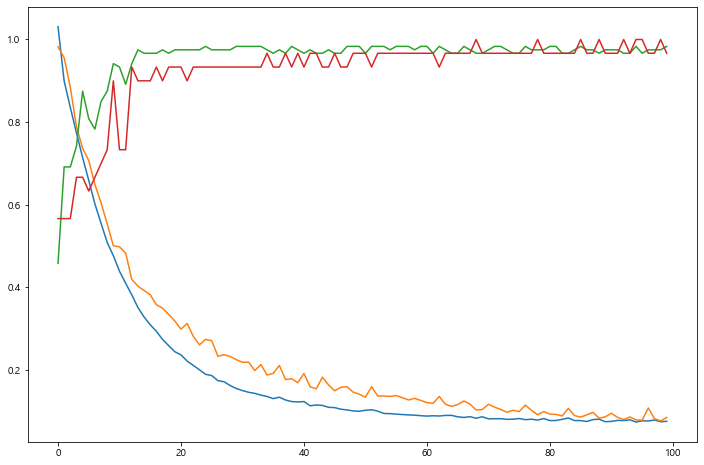

In [18]:
print(hist.history.keys())
plt.figure(figsize =(12,8) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])

In [19]:
loss, acc=model.evaluate(X_test, y_test)
print(loss, acc)

30/30 [==============================] - 0s 32us/step
0.08558161556720734 0.9666666388511658


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

test_set = np.array([[5, 2.9, 1, 0.2]])

print("품종예측 : ", iris["species"].unique()[model.predict_classes(test_set)])


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
품종예측 :  ['setosa']


# CNN


In [25]:
from keras.datasets import mnist
from keras import layers

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# one hot 인코딩
y_train= np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#이미지 데이터 스케일 조정

X_train = X_train.reshape((60000, 28,28,1)).astype("float32")/255
X_test = X_test.reshape((10000, 28,28,1)).astype("float32")/255

model = Sequential()

# conv layer : 필터개수는 32개, 크기는 3 * 3 
#한장에 대한 정보 
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32, (3,3), activation = "relu"))

#FC Layer
model.add(layers.Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

# model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam",
             metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.2536 - accuracy: 0.9237
Epoch 2/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0670 - accuracy: 0.9794
Epoch 3/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.0500 - accuracy: 0.9847
Epoch 4/5
60000/60000 [==============================] - 12s 193us/step - loss: 0.0404 - accuracy: 0.9877
Epoch 5/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0343 - accuracy: 0.9891


In [26]:
loss, acc = model.evaluate(X_test, y_test)
print(loss, acc)

10000/10000 [==============================] - 1s 90us/step
0.031603475481411444 0.9897000193595886
